In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from numpy import *
import xlrd
import os

In [29]:
def prepost(root_url="/content/",file_name="data",sheet_name=3,file_output="lists",root_output="/content/",label=0):

  # workbook=xlrd.open_workbook(root_url+file_name)
  df=pd.read_excel(root_url+file_name,sheet_name=sheet_name)
  # print(df)
  # print(len(df.index))

  listfile = open(root_output+file_output,"w", encoding='utf-8', newline='')
  writer = csv.writer(listfile)
  writer.writerow(['index','voltage','current','capacity','energy','total_capacity','total_energy','label'])
  
  data_len=len(df.index)
  print(data_len)

  qc=df[df['步次']==3].iloc[-1]['容量(Ah)']
  ec=df[df['步次']==3].iloc[-1]['能量(Wh)']
  
  c0=df[df['步次']==24].iloc[-1]['容量(Ah)']
  c1=df[df['步次']==25].iloc[-1]['容量(Ah)']
  # print(c0,c1)

  e0=df[df['步次']==24].iloc[-1]['能量(Wh)']
  e1=df[df['步次']==25].iloc[-1]['能量(Wh)']
  # print(e0,e1)

  c00=df[df['步次']==1].iloc[-1]['容量(Ah)']
  e00=df[df['步次']==1].iloc[-1]['能量(Wh)']
 
  for index in range(data_len):
    list0=[]
    list0.append(df.index[index])
    list0.append(df['电压(V)'][index])
    list0.append(df['电流(A)'][index])
    list0.append(df['容量(Ah)'][index])
    list0.append(df['能量(Wh)'][index])

    if df['状态'][index]=='恒流放电':
      list0[-2]=c00-list0[-2]
      list0[-1]=e00-list0[-1]    
    if df['状态'][index]=='恒流恒压充电':
      list0[-2]=c00+list0[-2]
      list0[-1]=e00+list0[-1]
    if df['状态'][index]=='搁置':
      list0[-2]=c00+list0[-2]
      list0[-1]=e00+list0[-1]

    if df['步次'][index]==24:
      list0[-2]=list0[-2]+c00
      list0[-1]=list0[-1]+e00
    if df['步次'][index]==25:
      list0[-2]=list0[-2]+c0+c00
      list0[-1]=list0[-1]+e0+e00
    if df['步次'][index]==26:
      list0[-2]=list0[-2]+c0+c1+c00
      list0[-1]=list0[-1]+e0+e1+e00

    if index<data_len-1:
      if df['状态'][index]!=df['状态'][index+1]: 
          c00=list0[-2]
          e00=list0[-1]
          if df['状态'][index+1]=='恒流恒压充电':
            c00=0
            e00=0
      
    list0.append(qc)
    list0.append(ec)
    list0.append(label)
    writer.writerow(list0)
  listfile.close()

In [30]:
root_output = "/content/drive/MyDrive/Paper/Safety_risk_2/DATA/"
root_url = "/content/drive/MyDrive/Paper/Safety_risk_2/DATA/R=INF/"

file_name = "202202210078.xlsx"
file_output = "R000N001.csv"

prepost(root_url=root_url,file_name=file_name,file_output=file_output,root_output=root_output)

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


179398


In [35]:
root_output = "/content/drive/MyDrive/Paper/Safety_risk_2/DATA/"
root_url = "/content/drive/MyDrive/Paper/Safety_risk_2/DATA/R=50/"

file_name = "202203140078.xlsx"
file_output = "R050N001.csv"

prepost(root_url=root_url,file_name=file_name,file_output=file_output,root_output=root_output)

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


260377


In [36]:
root_output = "/content/drive/MyDrive/Paper/Safety_risk_2/DATA/"
root_url = "/content/drive/MyDrive/Paper/Safety_risk_2/DATA/R=INF/"

file_name = "202202210016.xlsx"
file_output = "R000N300.csv"

prepost(root_url=root_url,file_name=file_name,file_output=file_output,root_output=root_output)

176308


In [ ]:
root_output = "/content/drive/MyDrive/Paper/Safety_risk_2/DATA/"
root_url = "/content/drive/MyDrive/Paper/Safety_risk_2/DATA/R=50/"

file_name = "202203140016.xlsx"
file_output = "R050N300.csv"

prepost(root_url=root_url,file_name=file_name,file_output=file_output,root_output=root_output)

In [39]:
root_output = "/content/drive/MyDrive/Paper/Safety_risk_2/DATA/"
root_url = "/content/drive/MyDrive/Paper/Safety_risk_2/DATA/R=500/"
label=470
file_names = [
  "202203070016.xlsx",
  "202203070078.xlsx"
  ]
file_outputs = [
  "R500N300.csv",
  "R500N001.csv"
  ]
for i in range(len(file_names)):
  file_name, file_output = file_names[i], file_outputs[i]
  prepost(root_url=root_url,file_name=file_name,file_output=file_output,root_output=root_output,label=label)

260349
262119


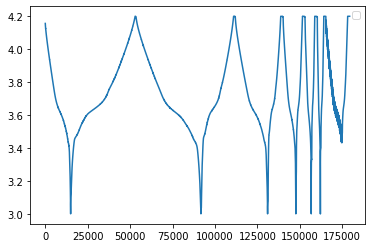

In [31]:
root_url = "/content/drive/MyDrive/Paper/Safety_risk_2/DATA/"
file_output = "R000N001.csv"

df0=pd.read_csv(root_url+file_output)

plt.figure()

arr0=df0['voltage']
plt.plot(np.arange(0,len(arr0),1),arr0)

plt.legend(loc="best")
plt.show()
plt.close()

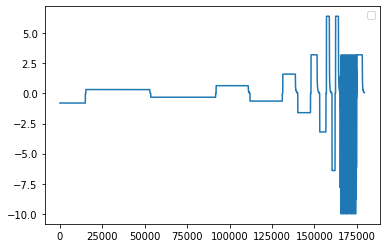

In [32]:
df1=pd.read_csv(root_url+file_output)

plt.figure()

arr0=df0['current']
plt.plot(np.arange(0,len(arr0),1),arr0)

plt.legend(loc="best")
plt.show()
plt.close()

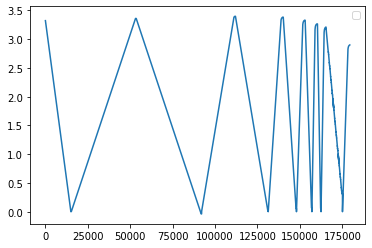

In [33]:
df2=pd.read_csv(root_url+file_output)

plt.figure()

arr0=df0['capacity']
plt.plot(np.arange(0,len(arr0),1),arr0)

plt.legend(loc="best")
plt.show()
plt.close()

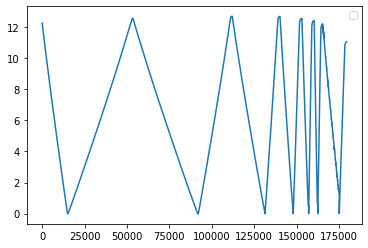

In [34]:
df3=pd.read_csv(root_url+file_output)

plt.figure()

arr0=df0['energy']
plt.plot(np.arange(0,len(arr0),1),arr0)

plt.legend(loc="best")
plt.show()
plt.close()

In [ ]:
root_output = "/content/drive/MyDrive/Paper/Safety_risk_2/DATA/"
root_url = "/content/drive/MyDrive/Paper/Safety_risk_2/DATA/R=INF/"
label=0
file_names = [
  "202202210016.xlsx",
  "202202210032.xlsx",
  "202202210048.xlsx",
  "202202210064.xlsx",
  "202202210078.xlsx",
  "202203070014.xlsx",
  "202203070030.xlsx",
  "202203070046.xlsx",
  "202203070062.xlsx",
  "202203070076.xlsx"
  ]
file_outputs = [
  "R000N300.csv",
  "R000N200.csv",
  "R000N100.csv",
  "R000N050.csv",
  "R000N001.csv",
  "R000N300_2.csv",
  "R000N200_2.csv",
  "R000N100_2.csv",
  "R000N050_2.csv",
  "R000N001_2.csv"
  ]
for i in range(len(file_names)):
  file_name, file_output = file_names[i], file_outputs[i]
  prepost(root_url=root_url,file_name=file_name,file_output=file_output,root_output=root_output,label=label)

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


176308
175606
177334
180609
179398
260805
265873
264430
267825
263526


In [ ]:
root_output = "/content/drive/MyDrive/Paper/Safety_risk_2/DATA/"
root_url = "/content/drive/MyDrive/Paper/Safety_risk_2/DATA/R=50/"
label=47
file_names = [
  "202203140016.xlsx",
  "202003170032.xlsx",
  "202203290048.xlsx",
  "202003170064.xlsx",
  "202203140078.xlsx"
  ]
file_outputs = [
  "R050N300.csv",
  "R050N200.csv",
  "R050N100.csv",
  "R050N050.csv",
  "R050N001.csv"
  ]
for i in range(len(file_names)):
  file_name, file_output = file_names[i], file_outputs[i]
  prepost(root_url=root_url,file_name=file_name,file_output=file_output,root_output=root_output,label=label)

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


260320
236304
236810
238334
260377


In [ ]:
root_output = "/content/drive/MyDrive/Paper/Safety_risk_2/DATA/"
root_url = "/content/drive/MyDrive/Paper/Safety_risk_2/DATA/R=100/"
label=100
file_names = [
  "202203010016.xlsx",
  "202203210032.xlsx",
  "202204010048.xlsx",
  "202203210064.xlsx",
  "202203010078.xlsx"
  ]
file_outputs = [
  "R100N300.csv",
  "R100N200.csv",
  "R100N100.csv",
  "R100N050.csv",
  "R100N001.csv"
  ]
for i in range(len(file_names)):
  file_name, file_output = file_names[i], file_outputs[i]
  prepost(root_url=root_url,file_name=file_name,file_output=file_output,root_output=root_output,label=label)

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


185231
205473
200058
207397
184333


In [ ]:
root_output = "/content/drive/MyDrive/Paper/Safety_risk_2/DATA/"
root_url = "/content/drive/MyDrive/Paper/Safety_risk_2/DATA/R=200/"
label=220
file_names = [
  "202203030016.xlsx",
  "202203260032.xlsx",
  "202204040048.xlsx",
  "202203230064.xlsx",
  "202203030078.xlsx"
  ]
file_outputs = [
  "R200N300.csv",
  "R200N200.csv",
  "R200N100.csv",
  "R200N050.csv",
  "R200N001.csv"
  ]
for i in range(len(file_names)):
  file_name, file_output = file_names[i], file_outputs[i]
  prepost(root_url=root_url,file_name=file_name,file_output=file_output,root_output=root_output,label=label)

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


178055
192546
196348
202941
179775


In [ ]:
root_output = "/content/drive/MyDrive/Paper/Safety_risk_2/DATA/"
root_url = "/content/drive/MyDrive/Paper/Safety_risk_2/DATA/R=500/"
label=470
file_names = [
  "202203070016.xlsx",
  "202203290032.xlsx",
  "202204060048.xlsx",
  "202203260064.xlsx",
  "202203070078.xlsx"
  ]
file_outputs = [
  "R500N300.csv",
  "R500N200.csv",
  "R500N100.csv",
  "R500N050.csv",
  "R500N001.csv"
  ]
for i in range(len(file_names)):
  file_name, file_output = file_names[i], file_outputs[i]
  prepost(root_url=root_url,file_name=file_name,file_output=file_output,root_output=root_output,label=label)

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


260349
196228
198326
200976
262119


In [ ]:

# filelist = []
# for root, dirs, files in os.walk(root_url):
#     filelist = files

# print(len(filelist)," file read...")

# for file in filelist: